HTML(value='<br><i> Программа считает, ждите </i><br>')

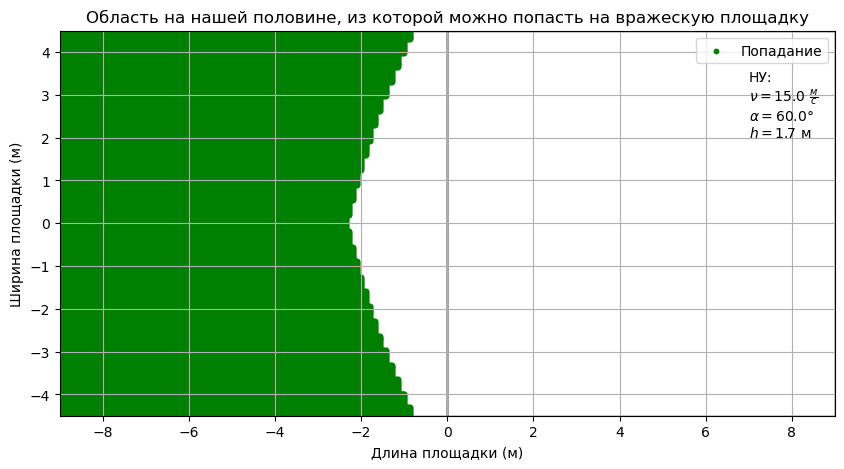

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import ipywidgets as widgets

  
v0=r'$\nu = $'
alpha1=r'$\alpha = $'
h1=r'$h = $'
ms=r'$\frac{м}{с}$'

def trajectory_2d(v, alpha, theta, t, x0, y0):
    alpha_rad = np.radians(alpha) 
    theta_rad = np.radians(theta)  

    x = x0 + v * np.cos(alpha_rad) * np.cos(theta_rad) * t
    y = y0 + v * np.cos(alpha_rad) * np.sin(theta_rad) * t
    z = h0 + v * np.sin(alpha_rad) * t - (g * t**2) / 2

    return x, y, z


def check_trajectory_2d(v, alpha, theta, x0, y0):
    
    alpha_rad = np.radians(alpha)
    t_flight = (v * np.sin(alpha_rad) + np.sqrt((v * np.sin(alpha_rad))**2 + 2 * g * h0)) / g    
    t_net = (d - x0) / (v * np.cos(alpha_rad) * np.cos(np.radians(theta)))
    _, y_net, z_net = trajectory_2d(v, alpha, theta, t_net, x0, y0)
    
    if z_net < H:
        return False     
    x_land, y_land, _ = trajectory_2d(v, alpha, theta, t_flight, x0, y0)
    
    if x_land < d:
        return False 
    elif x_land > d + L:
        return False  
    elif abs(y_land) > W / 2:
        return False  
    else:
        return True 

def main():
    court_width = 9.0  
    court_length = 9.0  
    grid_size = 400  
    x_positions = np.linspace(-court_length, 0, grid_size)
    y_positions = np.linspace(-court_width / 2, court_width / 2, grid_size)
    x_coords, y_coords = np.meshgrid(x_positions, y_positions)

    successful_x = []
    successful_y = []

    for i in range(grid_size):
        for j in range(grid_size):
            x0 = x_coords[i, j]
            y0 = y_coords[i, j]
            for theta in range(-90, 90, 1): 
                if check_trajectory_2d(v, alpha, theta, x0, y0):
                    successful_x.append(x0)
                    successful_y.append(y0)
                    break

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.add_patch(plt.Rectangle((-court_length, -court_width / 2), court_length, court_width, fill=False, color='black'))
    ax.add_patch(plt.Rectangle((0, -court_width / 2), court_length, court_width, fill=False, color='black'))
    ax.scatter(successful_x, successful_y, color='green', s=10, label='Попадание')
    ax.set_xlim(-court_length, court_length)
    ax.set_ylim(-court_width / 2, court_width / 2)
    ax.set_xlabel("Длина площадки (м)")
    ax.set_ylabel("Ширина площадки (м)")
    ax.set_title("Область на нашей половине, из которой можно попасть на вражескую площадку")

    ax.text(7,2,f"НУ:\n{v0}{v} {ms}\n{alpha1}{alpha}°\n{h1}{h0} м")
    ax.legend()
    plt.grid()
    plt.show()

def on_button_clicked(a):
    h4 = widgets.HTML("<br><i> Программа считает, ждите </i><br>")
    global h0,alpha,v
    h0=h.value
    alpha=alph.value
    v=V.value
    display(h4)
    main()
    h4.close()

V = widgets.BoundedFloatText(value=15, min=0.1, max=30.0, step=0.1, description="V = ",
disabled=False)
alph = widgets.BoundedFloatText(value=45, min=0.1, max=90.0, step=0.1, description="α = ",
disabled=False)
h = widgets.BoundedFloatText(value=1.5, min=1.0, max=3.0, step=0.1, description="h = ",
disabled=False)
button = widgets.Button(description="Click to Run Program", color="red",
background_color="lightgray")
form = widgets.VBox()
form.children = [V, alph, h, button]
display(form)
g = 9.81  
d = 9.0   
L = 9.0   
W = 9.0 
H = 2.43

button.on_click(on_button_clicked)
